In [1]:
#based on https://github.com/JuliaDynamics/CausalityTools.jl/blob/master/tutorials/Tutorial_BinnedResampling_RandomSequencesTest_PredictiveAsymmetryTest_ar1_unidir.ipynb
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames") 
Pkg.add("DynamicalSystems")
Pkg.add("CausalityTools")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("LaTeXStrings")
Pkg.add("Interpolations")


 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Res

In [35]:
using CausalityToolsBase
using DelimitedFiles
using CSV 
using DataFrames
d = DataFrame(readdlm("Julia/sim_Cenozoic.csv", ','))
#display(d)
print(optimal_delay(d.x2), ",")
print(optimal_delay(d.x2, method = "ac_zero"), ",")
print(optimal_delay(d.x2, method = "mi_min", τs = 1:10),".")

print(optimal_delay(d.x3), ",")
print(optimal_delay(d.x3, method = "ac_zero"), ",")
print(optimal_delay(d.x3, method = "mi_min", τs = 1:10), ",")


7,7,10.2,4,2,

┌ Warning: Did not encounter a minimum, returning last `τ`.
└ @ DelayEmbeddings /home/opit/.julia/packages/DelayEmbeddings/K1CTI/src/estimate_delay.jl:82
┌ Warning: Did not cross 0 value, returning last `τ`.
└ @ DelayEmbeddings /home/opit/.julia/packages/DelayEmbeddings/K1CTI/src/estimate_delay.jl:41
┌ Warning: Did not encounter a minimum, returning last `τ`.
└ @ DelayEmbeddings /home/opit/.julia/packages/DelayEmbeddings/K1CTI/src/estimate_delay.jl:82


In [12]:

using CSV 
using DataFrames
using DynamicalSystems
using Statistics
using(LaTeXStrings)
using UncertainData, CausalityTools, Distributions, StatsBase, 
    Test, Interpolations, Plots
using DelimitedFiles
using CausalityTools, DynamicalSystems, Plots

x, y = rand(300), rand(300)

# Define some causality tests and apply them to `x` and `y`.
test_ccm = ConvergentCrossMappingTest(timeseries_lengths = [45, 50], n_reps = 20)
test_cm = CrossMappingTest(n_reps = 10)
test_vf = VisitationFrequencyTest(binning = RectangularBinning(5), ηs = 1:5)
test_tog = TransferOperatorGridTest(binning = RectangularBinning(5), ηs = 1:5)
#test_nn = NearestNeighbourMITest(ηs = 1:5)
#test_jdd = JointDistanceDistributionTest()
#test_jddt = JointDistanceDistributionTTest()
test_pa = PredictiveAsymmetryTest(
    VisitationFrequencyTest(binning = RectangularBinning(5), ηs = -5:5))
#test_pan = NormalisedPredictiveAsymmetryTest(f = 1.0,
 #   VisitationFrequencyTest(binning = RectangularBinning(5), ηs = -5:5))

causality(x, y, test_ccm)
causality(x, y, test_cm)
causality(x, y, test_vf)
#causality(x, y, test_nn)
causality(x, y, test_tog)
#causality(x, y, test_jdd)
#causality(x, y, test_jddt)
causality(x, y, test_pa)
#causality(x, y, test_pan)


5-element Array{Float64,1}:
  0.027946229300209957
  0.01989582731281292 
 -0.01506440843610335 
 -0.10544514624979229 
 -0.09258993667910698 

In [25]:
data = Dataset(readdlm("Julia/sim_Cenozoic.csv", ',', Float64))

3-dimensional Dataset{Float64} with 100 points
  0.0       0.106223   -0.141921  
  0.660661  0.0919023  -0.105163  
  1.32132   0.181506   -0.0338811 
  1.98198   0.0683633   0.0340135 
  2.64264   0.1605     -0.137259  
  3.3033    0.182764    0.129873  
  3.96396   0.159217   -0.00658479
  4.62462   0.188605    0.0415615 
  5.28529   0.161981    0.0451753 
  5.94595   0.22105     0.0246498 
  6.60661   0.198081   -0.0709555 
  7.26727   0.193227    0.024293  
  7.92793   0.326177   -0.151312  
  ⋮                               
 58.1381    1.01134    -0.133758  
 58.7988    0.922166   -0.115895  
 59.4595    0.933132   -0.114816  
 60.1201    0.931262   -0.19869   
 60.7808    0.994014    0.160748  
 61.4414    0.887103    0.0625163 
 62.1021    0.851016   -0.0814598 
 62.7628    0.931089    0.170532  
 63.4234    0.987782    0.0309618 
 64.0841    0.935927   -0.0391257 
 64.7447    0.937841    0.105188  
 65.4054    0.91493    -0.0527218 

In [20]:
#data = Dataset(rand(1000, 2))
#writedlm("Julia/test_data.txt", data, ',')


npts = 100

# Create `npts` time steps randomly distributed between 1 and 500,
# and add time uncertainties.
time = sort(rand(1:1000, npts))

ts = [UncertainValue(Normal(t, rand(Uniform(10, 20)))) for t in time]
    
# Generate some time series of length `npts` and add measurement uncertainties.
sys = CausalityTools.ar1_unidir(c_xy = 0.7)
xs, ys = columns(trajectory(sys, npts - 1))
x = UncertainIndexValueDataset(ts, [UncertainValue(Normal(x, rand())) for x in xs]) #rand() samples a random uniform in [0,1)
y = UncertainIndexValueDataset(ts, [UncertainValue(Normal(y, rand())) for y in ys])

# Draw 300000 independent samples in total (from time and values simultaneously)
# from the data. Based on the value of the time draws, distribute the value 
# draws in bins that are 20 time steps wide and covers the interval [0, 1000].
# For each bin, create a new value distribution that has no time uncertainty 
# (assuming equiprobable time within each bin) and a new uncertainty distribution
# in the values. The new distributions are KDE estimates to the distributions 
# in each bin, hence the large number of samples.
left_bin_edges = 0:10:1000
bin_instructions = BinnedResampling(left_bin_edges, 100000)
x_binned = resample(x, bin_instructions)
y_binned = resample(y, bin_instructions)

400-element Array{Int64,1}:
   4
  10
  11
  15
  17
  19
  21
  22
  29
  32
  32
  32
  35
   ⋮
 970
 970
 980
 981
 982
 982
 983
 985
 991
 996
 997
 999

UncertainIndexValueDataset{UncertainIndexDataset,UncertainValueDataset} containing 100 uncertain values coupled with 100 uncertain indices


UncertainIndexValueDataset{UncertainIndexDataset,UncertainValueDataset} containing 400 uncertain values coupled with 400 uncertain indices


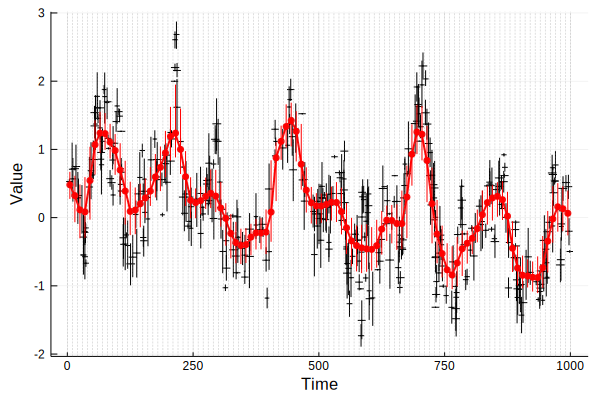

In [21]:

plot(xlabel = "Time", ylabel = "Value")
plot!(x, marker = stroke(0.01, :black), ms = 1, c = :black, label = "")
plot!(x_binned,  marker = stroke(0.01, :red), ms = 4, c = :red, label = "")
plot!(median.(x_binned.indices), median.(x_binned.values), lw = 2, c = :red, label = "")

vline!(left_bin_edges, c = :grey, lw = 0.5, lα = 0.5, ls = :dash, label = "")

UncertainIndexValueDataset{UncertainIndexDataset,UncertainValueDataset} containing 400 uncertain values coupled with 400 uncertain indices


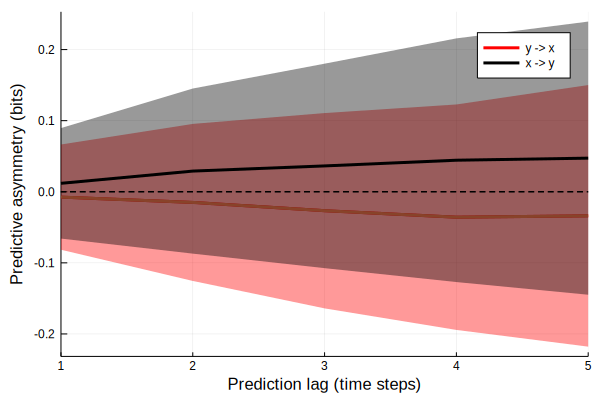

In [23]:

te_test = VisitationFrequencyTest(ηs = -5:5, binning = RectangularBinning(4))
pa_test = PredictiveAsymmetryTest(te_test)
# Run the causality test on 500 random subsampled chunks of lengths
# length(x_binned)-20 to length(x_binned)-1. Every time a chunk gets
# sampled, an independent realisation of the uncertain dataset is 
# drawn. Hence, to get 500 random realisations of the dataset within
# the uncertainties, we need to sample 500 different chunks (some 
# potentially identical, but on independent draws of the dataset).
L = length(x_binned)
ra_test = RandomSequencesTest(pa_test, RandomSequences(500, L-20:L-1))

# Compute predictive asymmetry in both directions.
pa_xy = causality(x_binned, y_binned, ra_test)
pa_yx = causality(y_binned, x_binned, ra_test);


xys = hcat(pa_xy...)
yxs = hcat(pa_yx...)

plot(xlabel = "Prediction lag (time steps)", ylabel = "Predictive asymmetry (bits)", xlims = (1, 5))
plot!(1:5, mean(yxs, dims=2), ribbon = std(yxs, dims = 2), lw = 3,
    label = "y -> x", fα = 0.4, c = :red)
plot!(1:5, mean(yxs, dims=2), lw = 3, label = "")
plot!(1:5, mean(xys, dims=2), ribbon = std(xys, dims = 2), lw = 3, 
    label = "x -> y", fα = 0.4, c = :black)
hline!([0], lw = 1.5, ls = :dash, c = :black, label = "")

